# Comparision of dimensional reduction methods with Jupyter Notebook × Papermill

## Package Loading
---

In [1]:
library("nnTensor")
library("lle")
library("MASS")
library("som")
library("destiny")
library("RDRToolbox")
library("Rtsne")
library("uwot")
library("igraph")
library("Matrix")
library("RANN")
library("ForceAtlas2")

Loading required package: scatterplot3d
Loading required package: MASS
Loading required package: snowfall
Loading required package: snow
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Loading required package: Matrix

Attaching package: ‘igraph’

The following object is masked from ‘package:som’:

    normalize

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



## Parameters
---

In [1]:
# infile <- "data/input.csv"
# infile2 <- "data/label.csv"
# outdir <- "output/papermill"

# pca_ndim <- 3
# nmf_ndim <- 4
# mds_ndim <- 4
# lda_ndim <- 3
# som_ndim <- 2
# isomap_ndim <- 2
# lle_ndim <- 2
# dmap_ndim <- 4
# tsne_ndim <- 2
# umap_ndim <- 2
# tumap_ndim <- 2
# fatlas2_ndim <- 2

pca_outfile <- paste(outdir, "pca.csv", sep="/")
nmf_outfile <- paste(outdir, "nmf.csv", sep="/")
mds_outfile <- paste(outdir, "mds.csv", sep="/")
lda_outfile <- paste(outdir, "lda.csv", sep="/")
som_outfile <- paste(outdir, "som.csv", sep="/")
isomap_outfile <- paste(outdir, "isomap.csv", sep="/")
lle_outfile <- paste(outdir, "lle.csv", sep="/")
dmap_outfile <- paste(outdir, "dmap.csv", sep="/")
tsne_outfile <- paste(outdir, "tsne.csv", sep="/")
umap_outfile <- paste(outdir, "umap.csv", sep="/")
tumap_outfile <- paste(outdir, "tumap.csv", sep="/")
fatlas2_outfile <- paste(outdir, "fatlas2.csv", sep="/")

ERROR: Error in paste(outdir, "pca.csv", sep = "/"):  オブジェクト 'outdir' がありません 


## Data loading, pre-processing
---

In [3]:
# Data Loading
indata <- as.matrix(read.csv(infile, header=FALSE))
label <- unlist(read.table(infile2))

# Log-transformation
indata <- log10(indata + 1)

## Principal component analysis (PCA)
---

### Dimensional reduction

In [4]:
out.pca <- prcomp(indata)

### Data saving

In [5]:
write.table(out.pca$rotation[, 1:pca_ndim], pca_outfile, row.names=FALSE, col.names=FALSE, quote=FALSE)

### Visualization

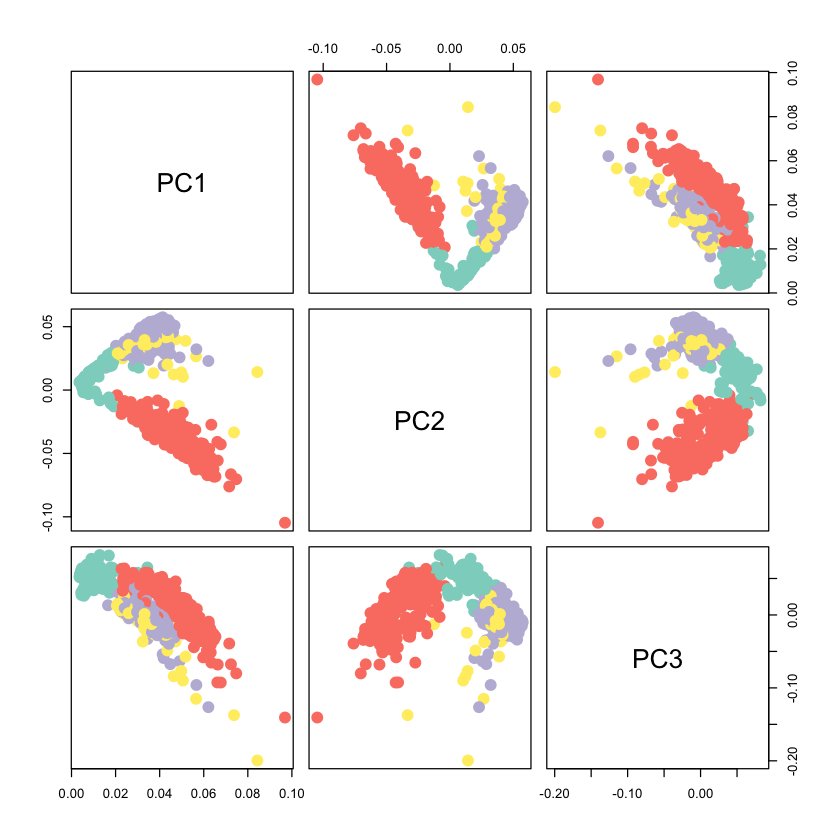

In [6]:
pairs(out.pca$rotation[, 1:pca_ndim], pch=16, cex=2, col=label)

## Non-negative matrix factorization (NMF)
---

### Dimensional reduction

In [7]:
set.seed(1234)
out.nmf <- NMF(indata, J=nmf_ndim, num.iter=30)

### Data saving

In [8]:
write.table(out.nmf$V, nmf_outfile, row.names=FALSE, col.names=FALSE, quote=FALSE)

### Visualization

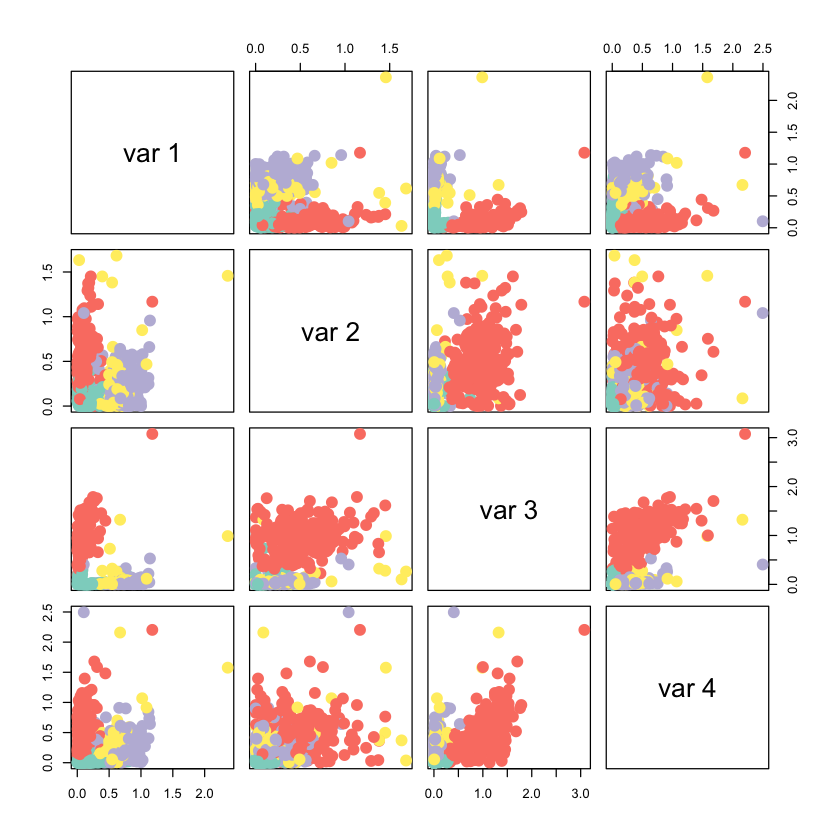

In [9]:
pairs(out.nmf$V[, 1:nmf_ndim], pch=16, cex=2, col=label)

## Multi dimensional scaling (MDS)
---

### Dimensional reduction

In [10]:
out.mds <- cmdscale(dist(t(indata)), mds_ndim)

### Data saving

In [11]:
write.table(out.mds, mds_outfile, row.names=FALSE, col.names=FALSE, quote=FALSE)

### Visualization

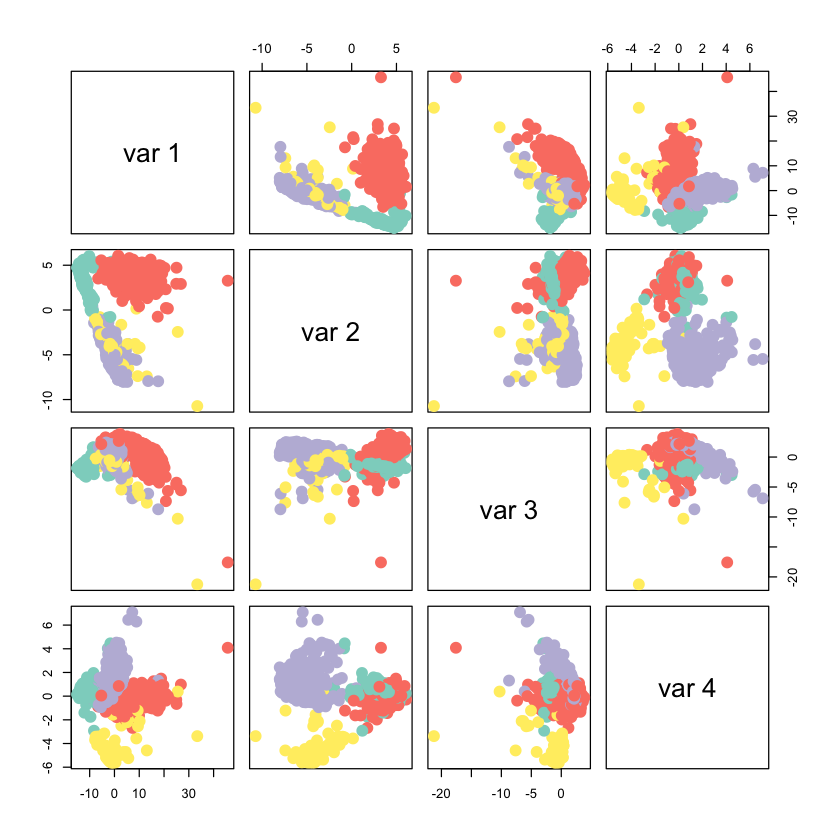

In [12]:
pairs(out.mds[, 1:mds_ndim], pch=16, cex=2, col=label)

## Linear discriminant analysis (LDA)
---

### Dimensional reduction

In [13]:
out.lda <- lda(label~., data=as.data.frame(out.pca$rotation[,1:30]))
out.lda <- predict(out.lda)$x

### Data saving

In [14]:
write.table(out.lda[, 1:lda_ndim], lda_outfile, row.names=FALSE, col.names=FALSE, quote=FALSE)

### Visualization

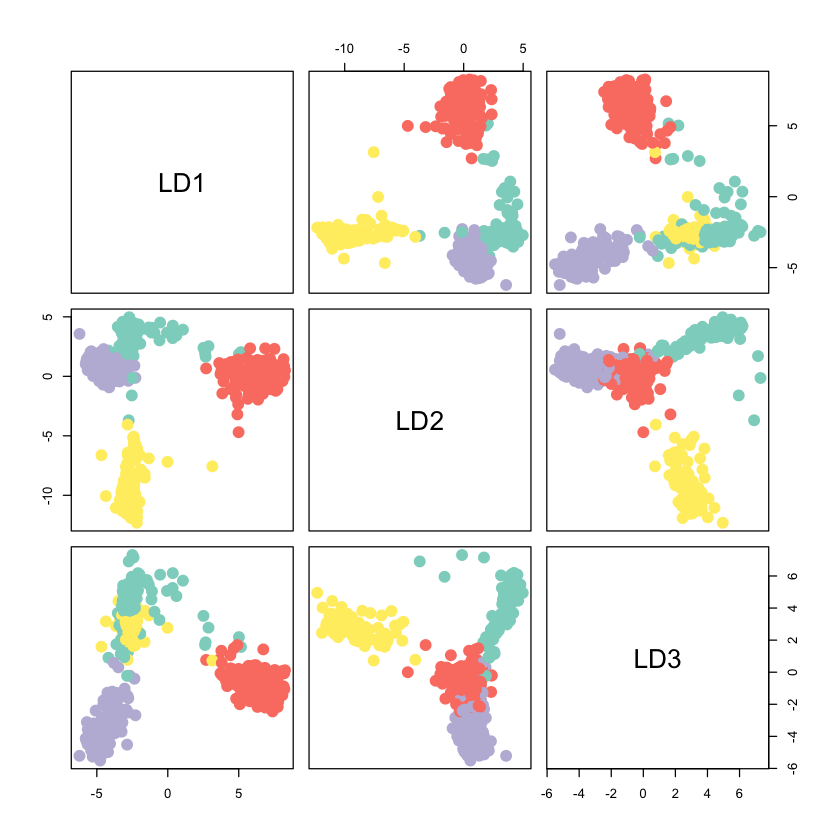

In [15]:
pairs(out.lda[, 1:lda_ndim], pch=16, cex=2, col=label)

## Self Organizing Maps (SOM)
---

### Dimensional reduction

In [16]:
set.seed(1234)
out.som <- som(out.pca$rotation[,1:50], xdim=5, ydim=5)
out.som <- out.som$visual[,1:2] + 0.5 + cbind(rnorm(ncol(indata),0, 0.2), rnorm(ncol(indata), 0, 0.2))

### Data saving

In [17]:
write.table(out.som, som_outfile, row.names=FALSE, col.names=FALSE, quote=FALSE)

### Visualization

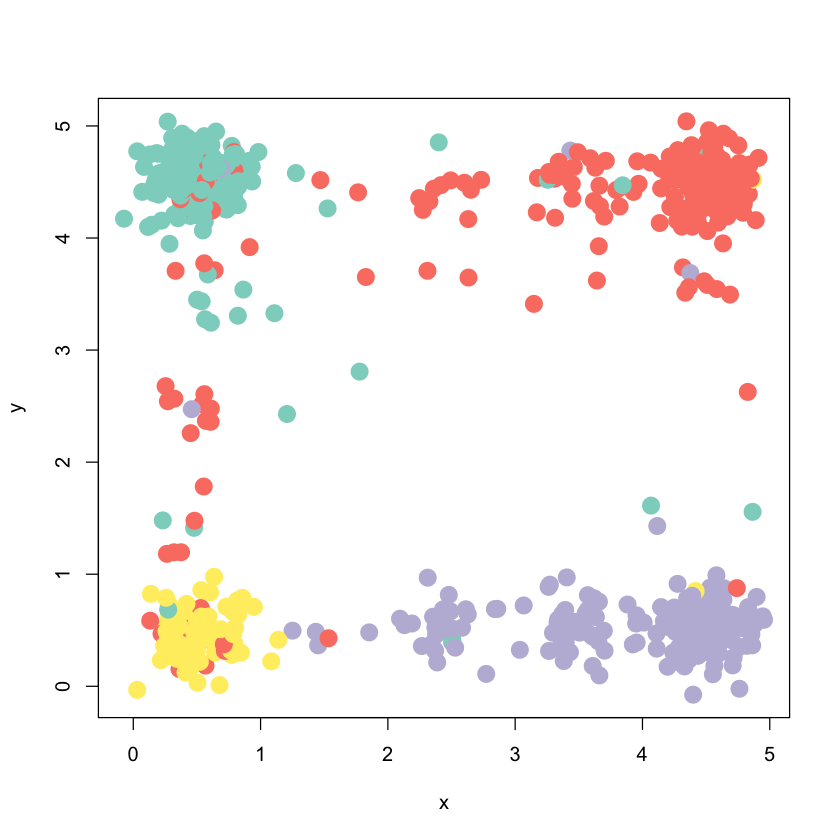

In [18]:
plot(out.som[, 1:som_ndim], pch=16, cex=2, col=label)

## Isometric mapping (Isomap)
---

### Dimensional reduction

In [19]:
out.isomap <- Isomap(data=t(indata), dims=isomap_ndim, k=5)

Computing distance matrix ... done
Building graph with shortest paths (using 5 nearest neighbours) ... done
Computing low dimensional embedding ... done
number of samples: 713
reduction from 17467 to 2 dimensions
number of connected components in graph: 1


### Data saving

In [20]:
write.table(out.isomap[[1]], isomap_outfile, row.names=FALSE, col.names=FALSE, quote=FALSE)

### Visualization

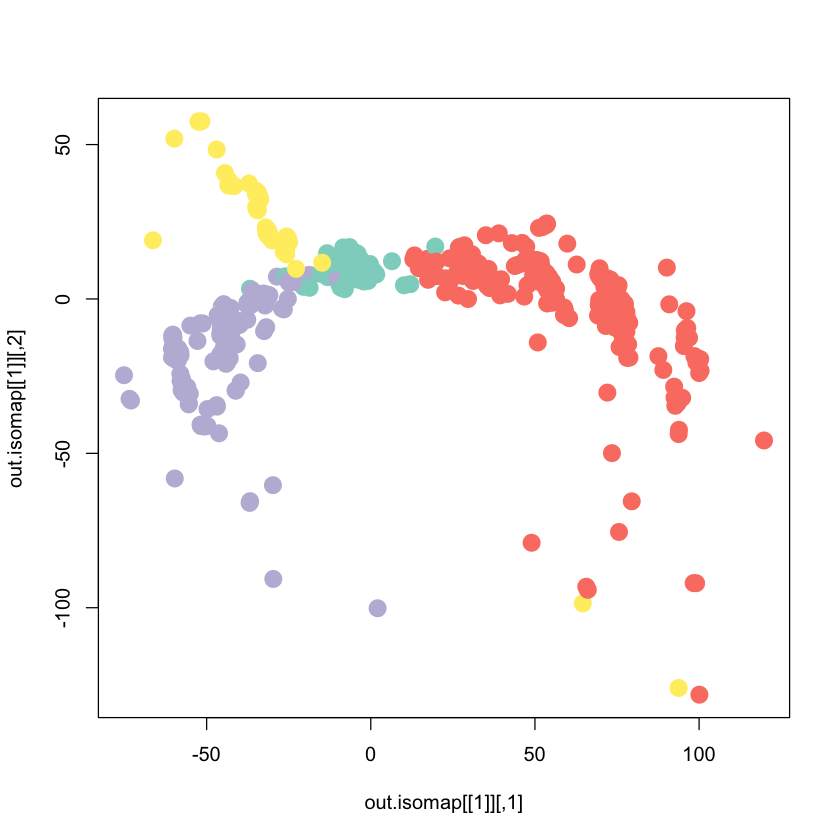

In [21]:
plot(out.isomap[[1]], pch=16, cex=2, col=label)

## Locally-Linear Embedding (LLE)
---

### Dimensional reduction

In [22]:
set.seed(1234)
out.lle <- lle(out.pca$rotation[,1:50], m=2, k=20)

finding neighbours
calculating weights
computing coordinates


### Data saving

In [23]:
write.table(out.lle$Y, lle_outfile, row.names=FALSE, col.names=FALSE, quote=FALSE)

### Visualization

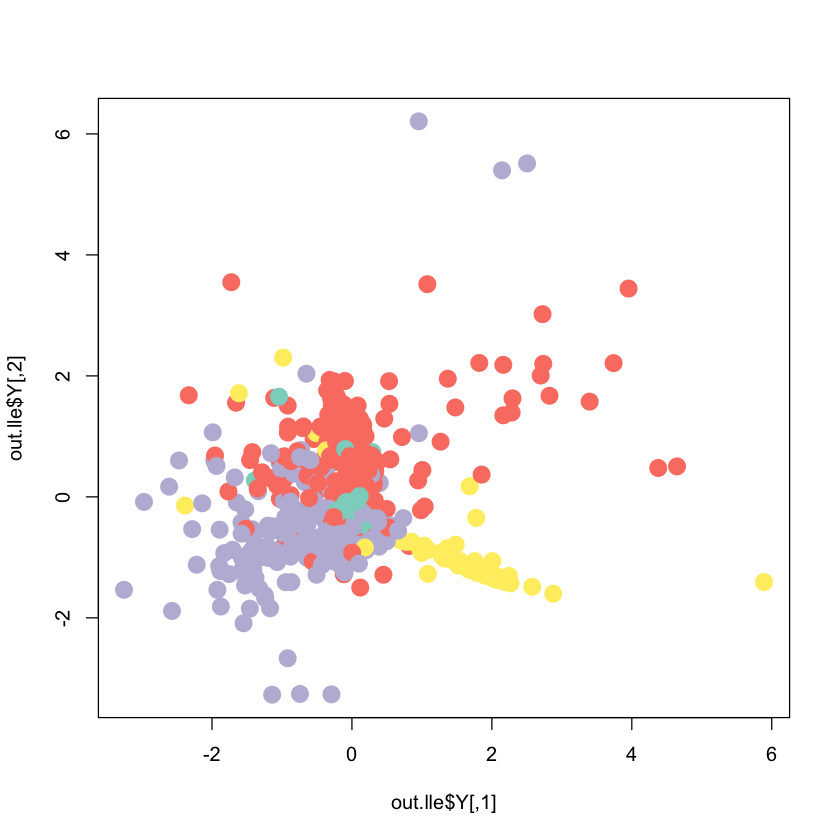

In [24]:
plot(out.lle$Y, pch=16, cex=2, col=label)

## Diffusion Map
---

### Dimensional reduction

In [25]:
out.dmap <- DiffusionMap(out.pca$rotation[,1:50], n_eigs=dmap_ndim)

### Data saving

In [26]:
write.table(out.dmap@eigenvectors, dmap_outfile, row.names=FALSE, col.names=FALSE, quote=FALSE)

### Visualization

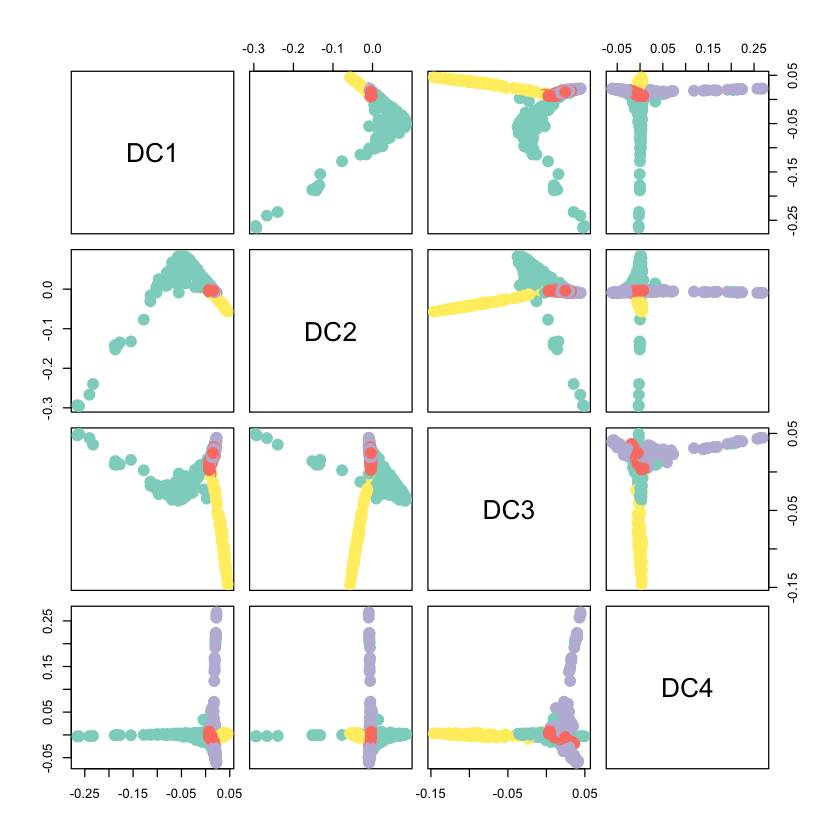

In [27]:
pairs(out.dmap@eigenvectors[, 1:dmap_ndim], pch=16, cex=2, col=label)

## t-Stochastic Neighbor Embedding (t-SNE)
---

### Dimensional reduction

In [28]:
set.seed(1234)
out.tsne <- Rtsne(t(indata), dims=tsne_ndim)

### Data saving

In [29]:
write.table(out.tsne$Y, tsne_outfile, row.names=FALSE, col.names=FALSE, quote=FALSE)

### Visualization

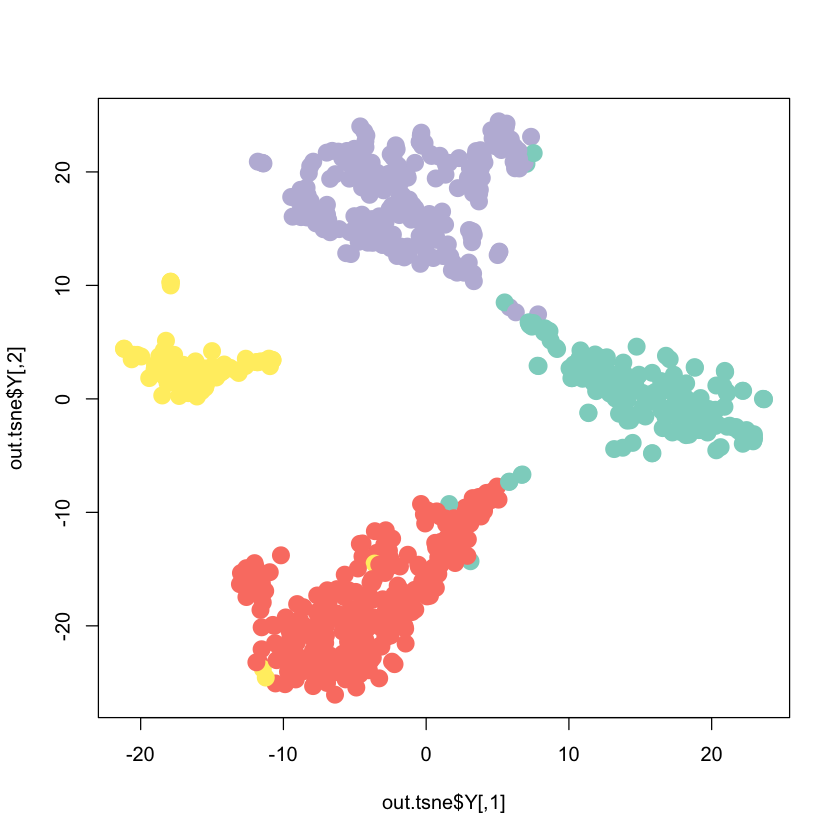

In [30]:
plot(out.tsne$Y, pch=16, cex=2, col=label)

## Uniform Manifold Approximation and Projection (UMAP)
---

### Dimensional reduction

In [31]:
set.seed(1234)
out.umap <- umap(t(indata), n_components=umap_ndim)

Found more than one class "dist" in cache; using the first, from namespace 'spam'
Also defined by ‘BiocGenerics’
Found more than one class "dist" in cache; using the first, from namespace 'spam'
Also defined by ‘BiocGenerics’


### Data saving

In [32]:
write.table(out.umap, umap_outfile, row.names=FALSE, col.names=FALSE, quote=FALSE)

### Visualization

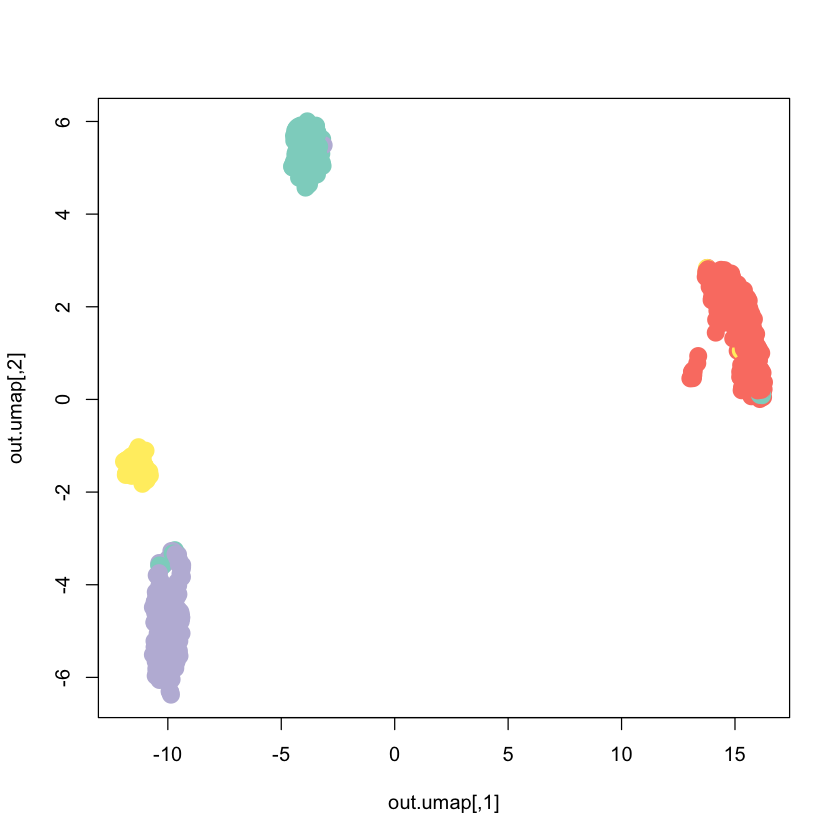

In [33]:
plot(out.umap, pch=16, cex=2, col=label)

## t-Uniform Manifold Approximation and Projection (t-UMAP)
---

### Dimensional reduction

In [34]:
set.seed(1234)
out.tumap <- tumap(t(indata), n_components=tumap_ndim)

Found more than one class "dist" in cache; using the first, from namespace 'spam'
Also defined by ‘BiocGenerics’
Found more than one class "dist" in cache; using the first, from namespace 'spam'
Also defined by ‘BiocGenerics’


### Data saving

In [35]:
write.table(out.tumap, tumap_outfile, row.names=FALSE, col.names=FALSE, quote=FALSE)

### Visualization

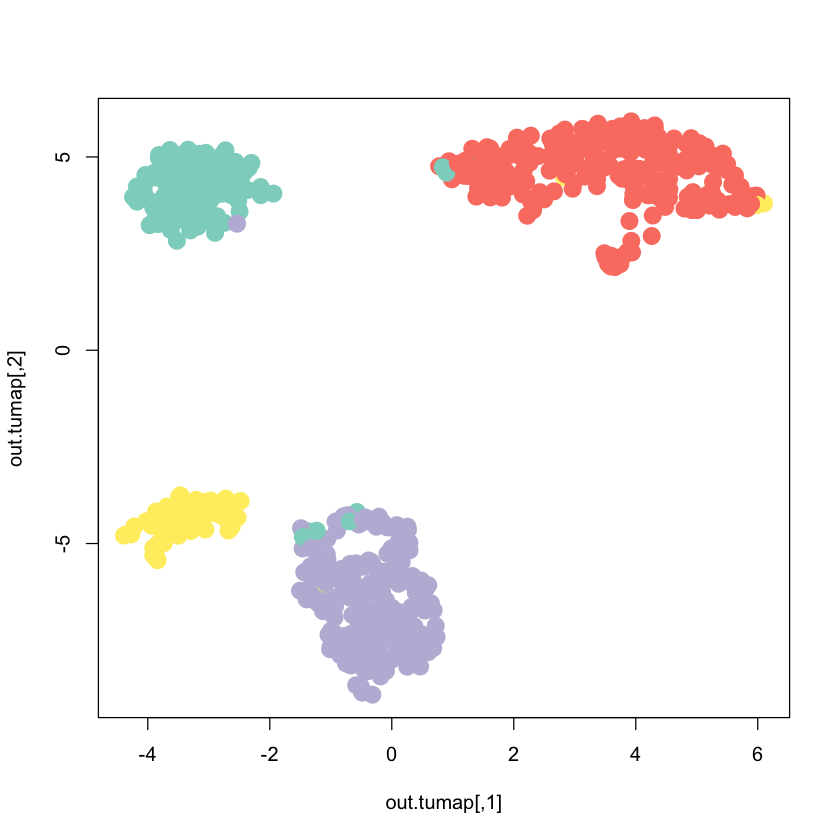

In [36]:
plot(out.tumap, pch=16, cex=2, col=label)

## ForceAtlas2 (A force-directed layout)
---

### Constructing a sparse adjacency matrix

In [37]:
k = 3
neighbors <- nn2(t(indata), k=k)
n_cells <- ncol(indata)
A <- sparseMatrix(
    i = rep(1:n_cells, k),            # row indexes
    j = as.vector(neighbors$nn.idx),  # column indexes
    x = 1,                            # non-zero value
    dims = c(n_cells, n_cells)        # matrix size
)
AA <- A %*% t(A)
S <- sparseMatrix(i = AA@i + 1, p = AA@p,
    x = AA@x / (2 * k - AA@x), dims = dim(AA))
G <- graph_from_adjacency_matrix(S, weighted = TRUE,
    mode = "undirected", diag = FALSE)

### Dimensional reduction

In [39]:
set.seed(1234)
out.fatlas2 <- layout.forceatlas2(G, k=k, pos=out.pca$rotation[,1:2], plotstep=1E+10)

### Data saving

In [40]:
write.table(out.fatlas2, fatlas2_outfile, row.names=FALSE, col.names=FALSE, quote=FALSE)

### Visualization

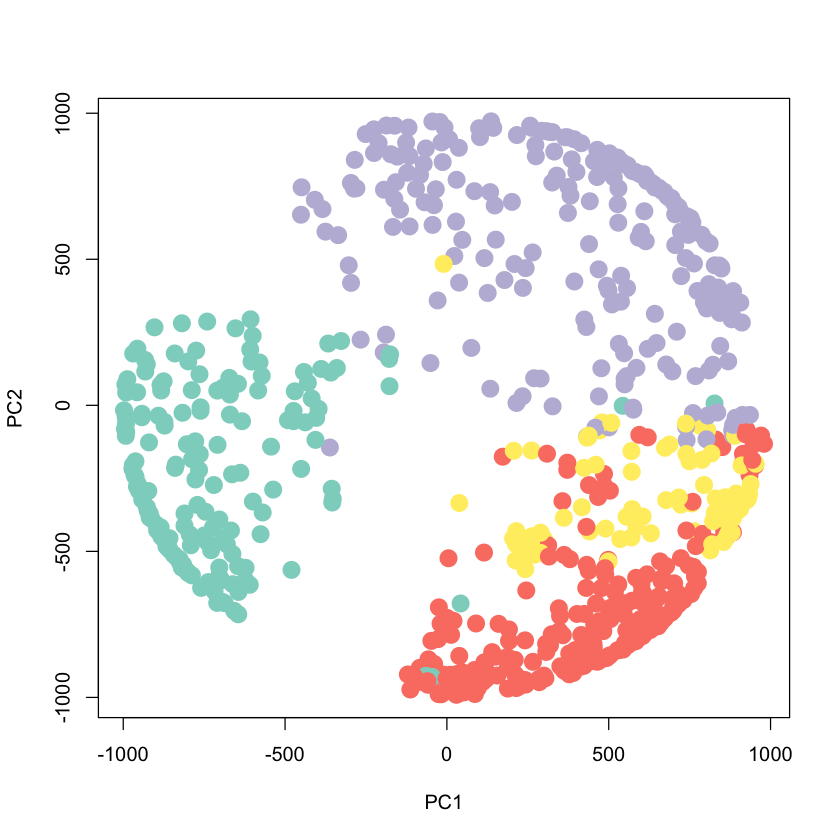

In [41]:
plot(out.fatlas2, pch=16, cex=2, col=label)

In [42]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS Catalina 10.15.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/3.6/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.6/Resources/lib/libRlapack.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] ForceAtlas2_0.1      RANN_2.6.1           igraph_1.2.4.1      
 [4] uwot_0.1.4           Matrix_1.2-17        Rtsne_0.15          
 [7] RDRToolbox_1.34.0    destiny_2.14.0       som_0.3-5.1         
[10] lle_1.1              snowfall_1.84-6.1    snow_0.4-3          
[13] MASS_7.3-51.4        scatterplot3d_0.3-41 nnTensor_1.0.2      

loaded via a namespace (and not attached):
  [1] tagcloud_0.6                colorspace_1.4-1           
  [3] RcppEigen_0.3.3.7.0         class_7.3-15               
  [5] rio_0.5.16                